In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None


import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

from imblearn.combine import SMOTETomek

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score

import pickle

In [11]:
df = pd.read_csv("../datos/creditcardmarketing.csv", header = None )

In [12]:
col = ["id","accepted","reward","mail_type","income_lv","accounts","protection","cred_rating","cards","homes","household","owner","balanceQ1", "balanceQ2", "balanceQ3", "balanceQ4", "balance"]

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [14]:
df.columns = col

In [15]:
df.head()

,id,accepted,reward,mail_type,income_lv,accounts,protection,cred_rating,cards,homes,household,owner,balanceQ1,balanceQ2,balanceQ3,balanceQ4,balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [16]:
df.shape

(18000, 17)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           18000 non-null  int64  
 1   accepted     18000 non-null  object 
 2   reward       18000 non-null  object 
 3   mail_type    18000 non-null  object 
 4   income_lv    18000 non-null  object 
 5   accounts     18000 non-null  int64  
 6   protection   18000 non-null  object 
 7   cred_rating  18000 non-null  object 
 8   cards        18000 non-null  int64  
 9   homes        18000 non-null  int64  
 10  household    18000 non-null  int64  
 11  owner        18000 non-null  object 
 12  balanceQ1    17976 non-null  float64
 13  balanceQ2    17976 non-null  float64
 14  balanceQ3    17976 non-null  float64
 15  balanceQ4    17976 non-null  float64
 16  balance      17976 non-null  float64
dtypes: float64(5), int64(5), object(7)
memory usage: 2.3+ MB


In [18]:
df. describe().T

,count,mean,std,min,25%,50%,75%,max
id,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
accounts,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
cards,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
homes,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
household,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
balanceQ1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
balanceQ2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
balanceQ3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
balanceQ4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [19]:
df. describe(include = "object").T

,count,unique,top,freq
accepted,18000,2,No,16977
reward,18000,3,Air Miles,6061
mail_type,18000,2,Postcard,9147
income_lv,18000,3,Medium,9013
protection,18000,2,No,15322
cred_rating,18000,3,High,6071
owner,18000,2,Yes,11655


In [20]:
df.isnull().sum()

id              0
accepted        0
reward          0
mail_type       0
income_lv       0
accounts        0
protection      0
cred_rating     0
cards           0
homes           0
household       0
owner           0
balanceQ1      24
balanceQ2      24
balanceQ3      24
balanceQ4      24
balance        24
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
aceptaron = df["accepted"].value_counts()
aceptaron

No     16977
Yes     1023
Name: accepted, dtype: int64

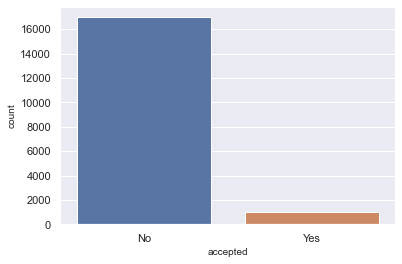

In [23]:
sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "accepted");

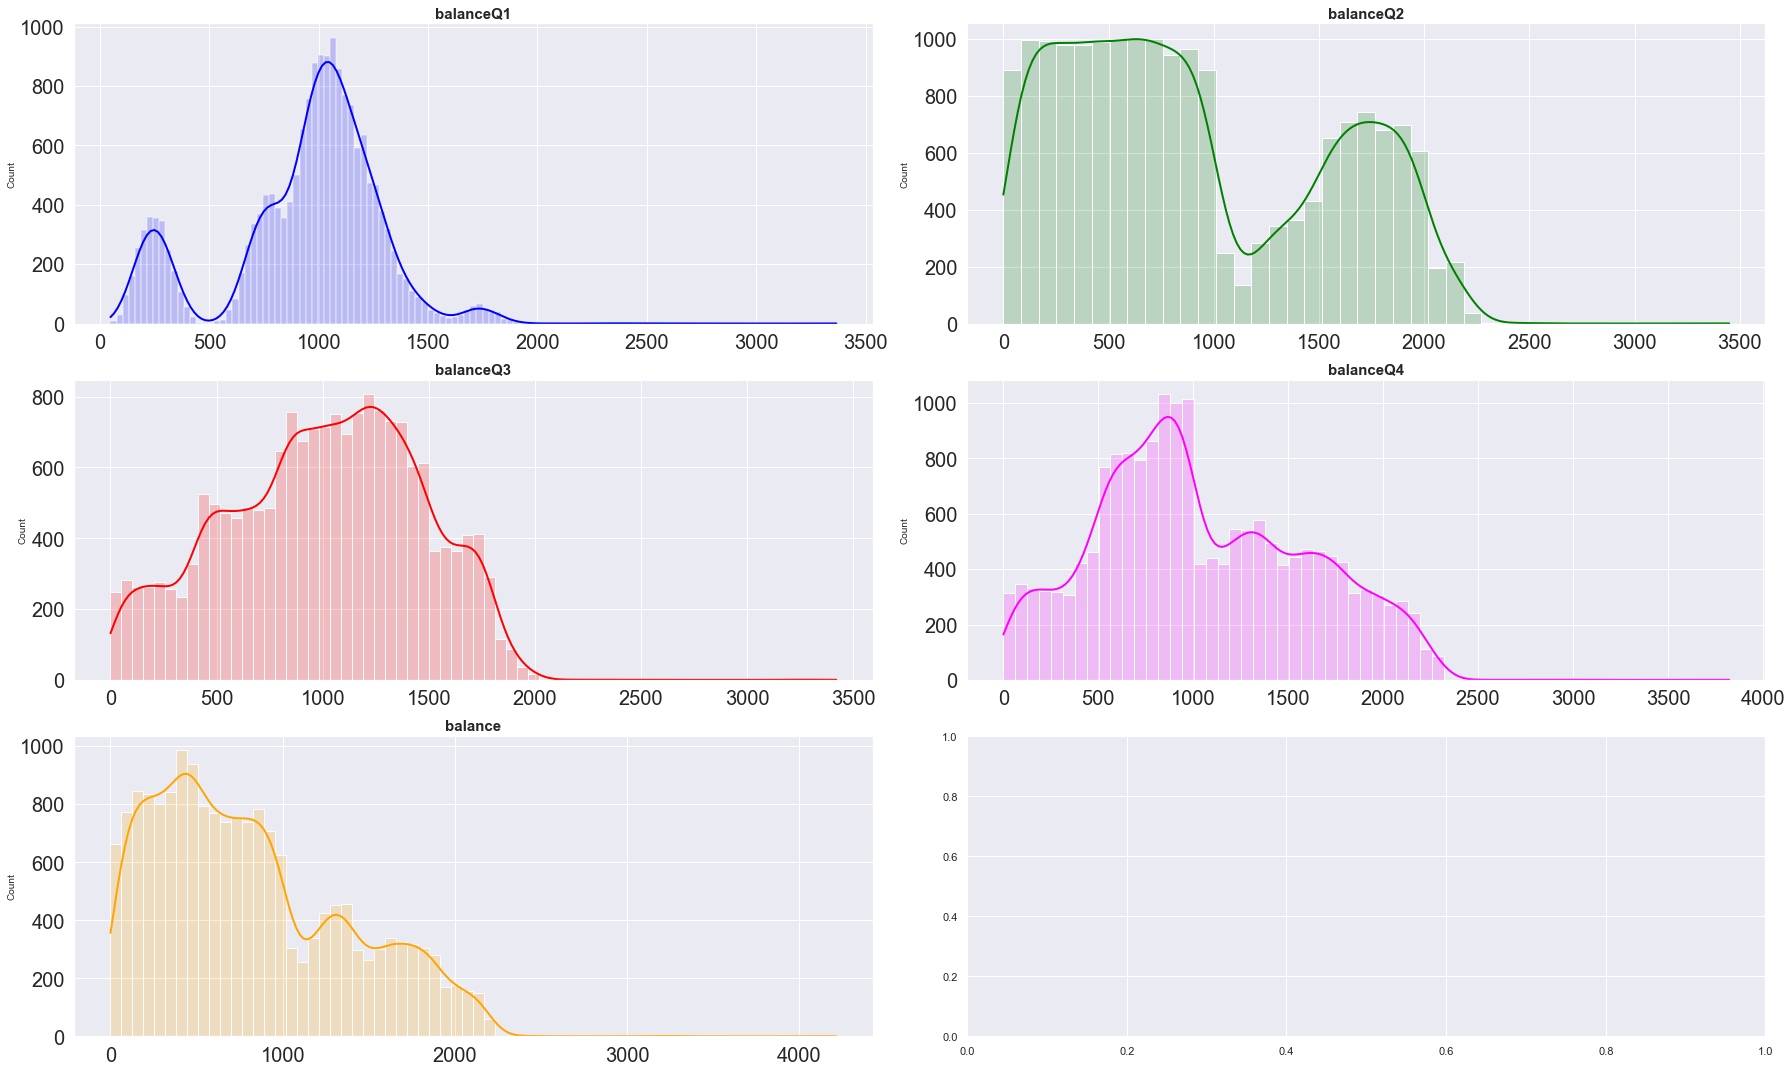

In [24]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (25, 15))

lista_colores = ["blue", "green", "red", "magenta", "orange", "yellow", "purple", "gold", "cyan"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["id", "accounts", "cards", "homes", "household"])

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

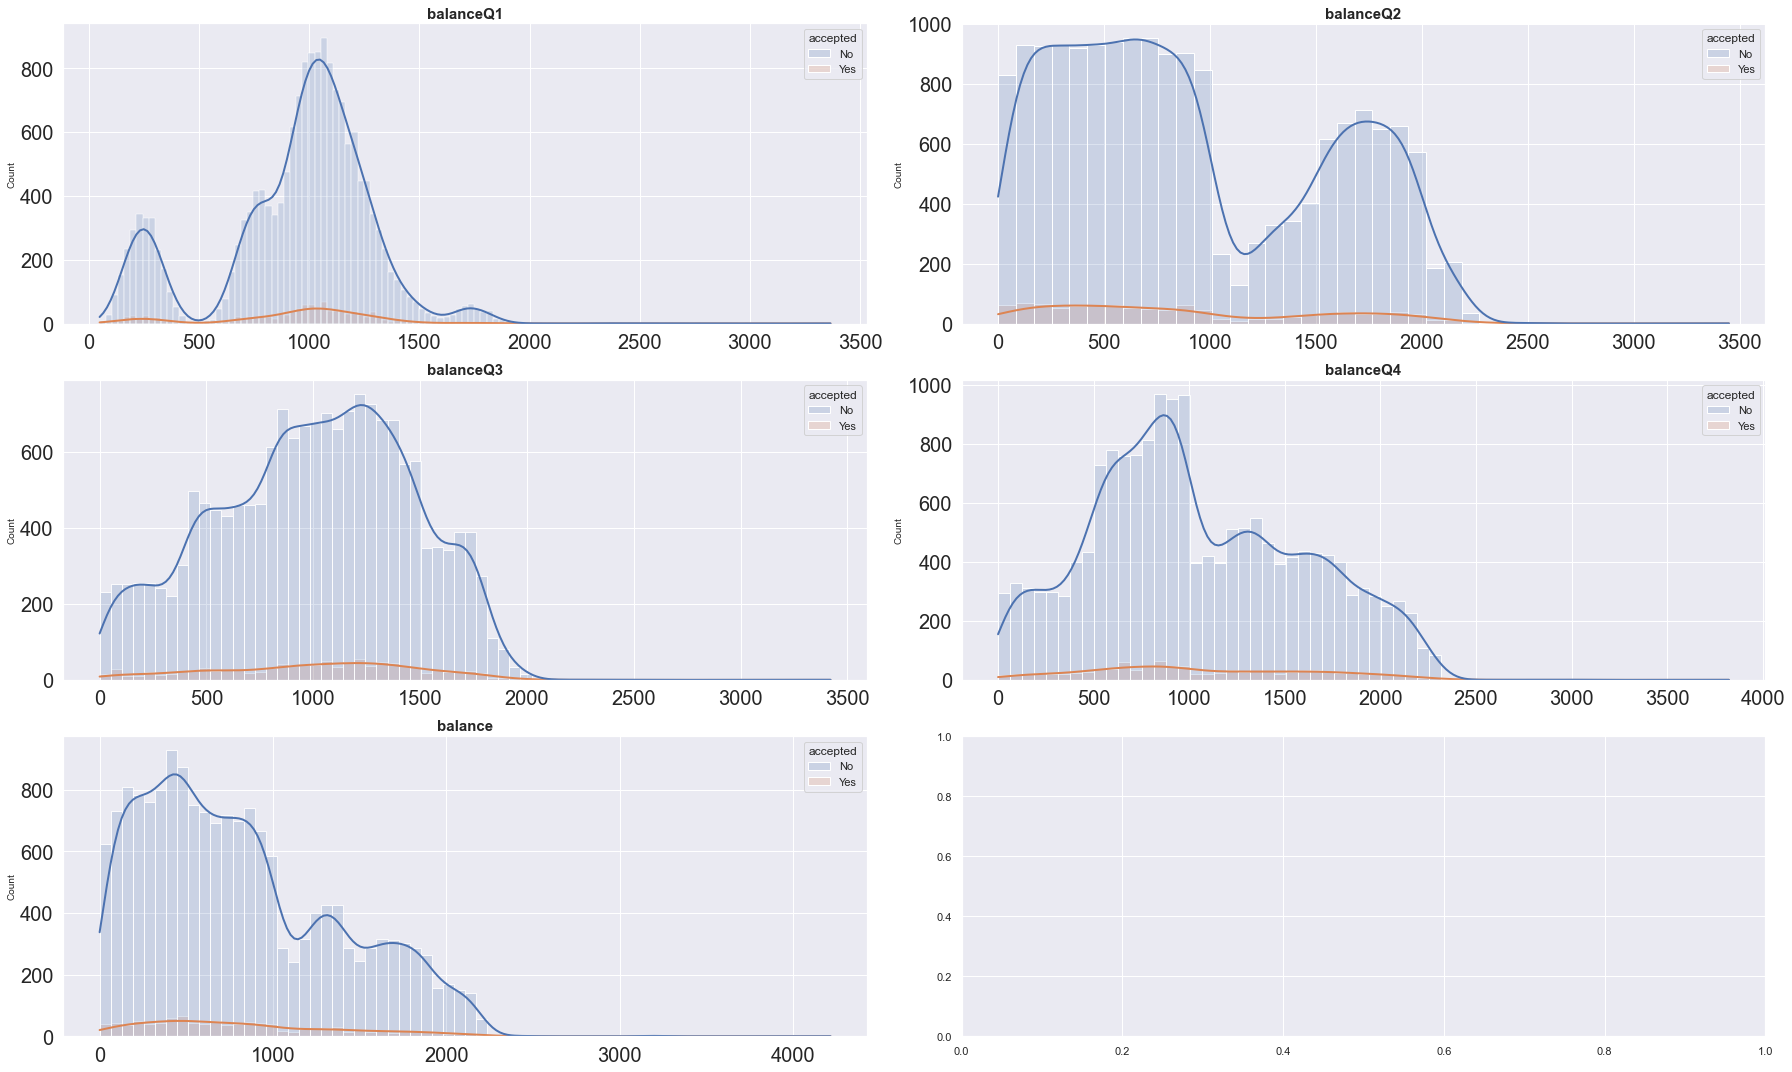

In [25]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (25, 15))

lista_colores = ["blue", "green", "red", "magenta", "orange", "yellow", "purple", "gold", "cyan"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["id", "accounts", "cards", "homes", "household"])

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        hue = "accepted",
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

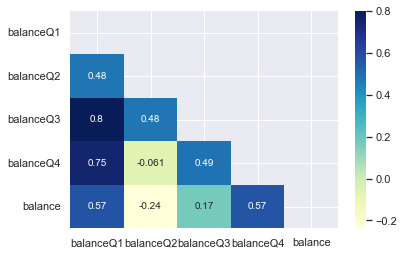

In [26]:
mask = np.triu(np.ones_like(df[columnas_numeric].corr(), dtype = np.bool))
sns.heatmap(df[columnas_numeric].corr(), 
            cmap = "YlGnBu", 
            mask = mask,
            annot = True);

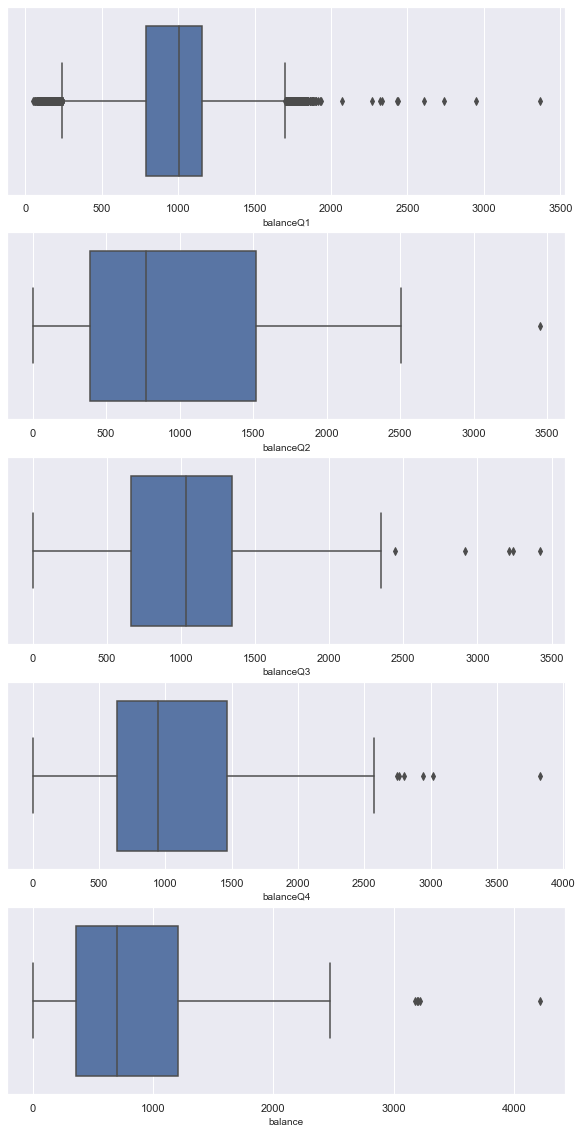

In [27]:
fig, ax = plt.subplots(5, 1, figsize=(10,20))

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["id", "accounts", "cards", "homes", "household"])

for i in range(len(columnas_numeric)):
    sns.boxplot(x = columnas_numeric[i], data = df, ax=ax[i])
plt.show() 

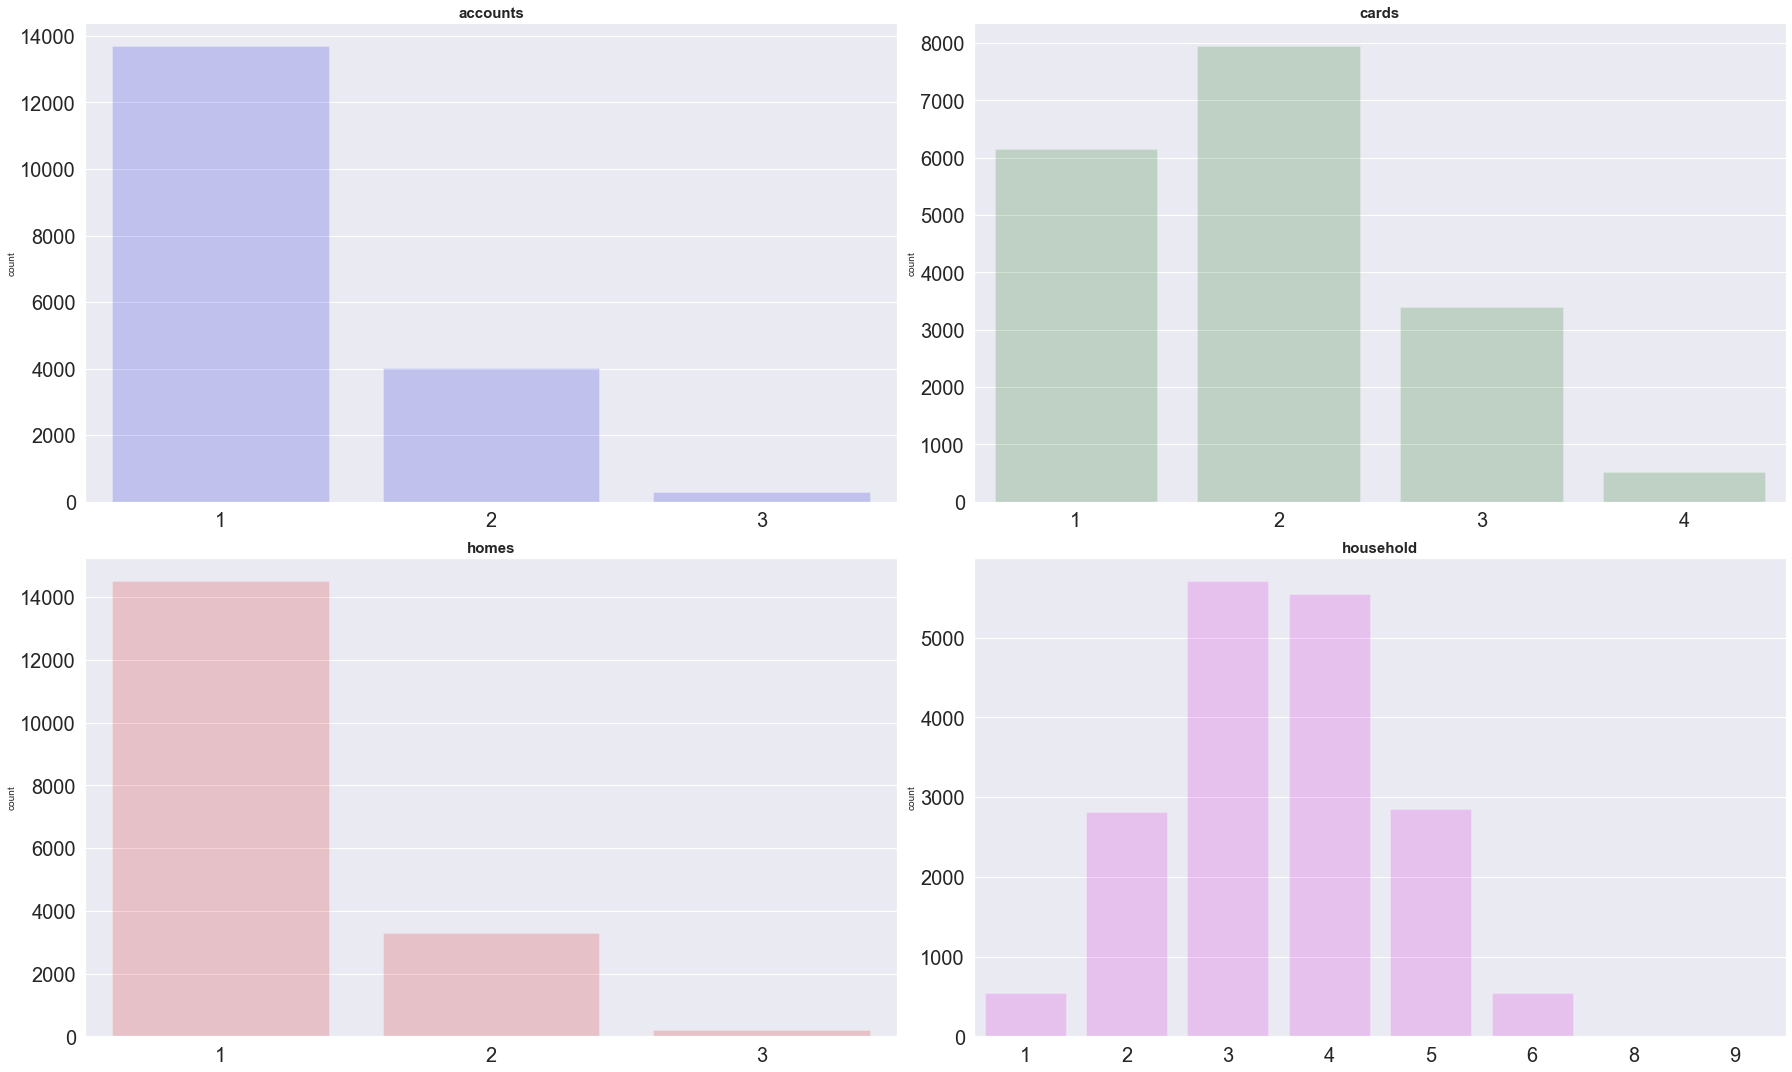

In [28]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 15))

lista_colores = ["blue", "green", "red", "magenta", "orange", "yellow", "purple", "gold", "cyan"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric_dis = columnas_numeric.drop(["id", "balanceQ1", "balanceQ2", "balanceQ3", "balanceQ4", "balance"])

for i, colum in enumerate(columnas_numeric_dis): 
    sns.countplot(
        data = df,
        x = colum,
        color = lista_colores[i], 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


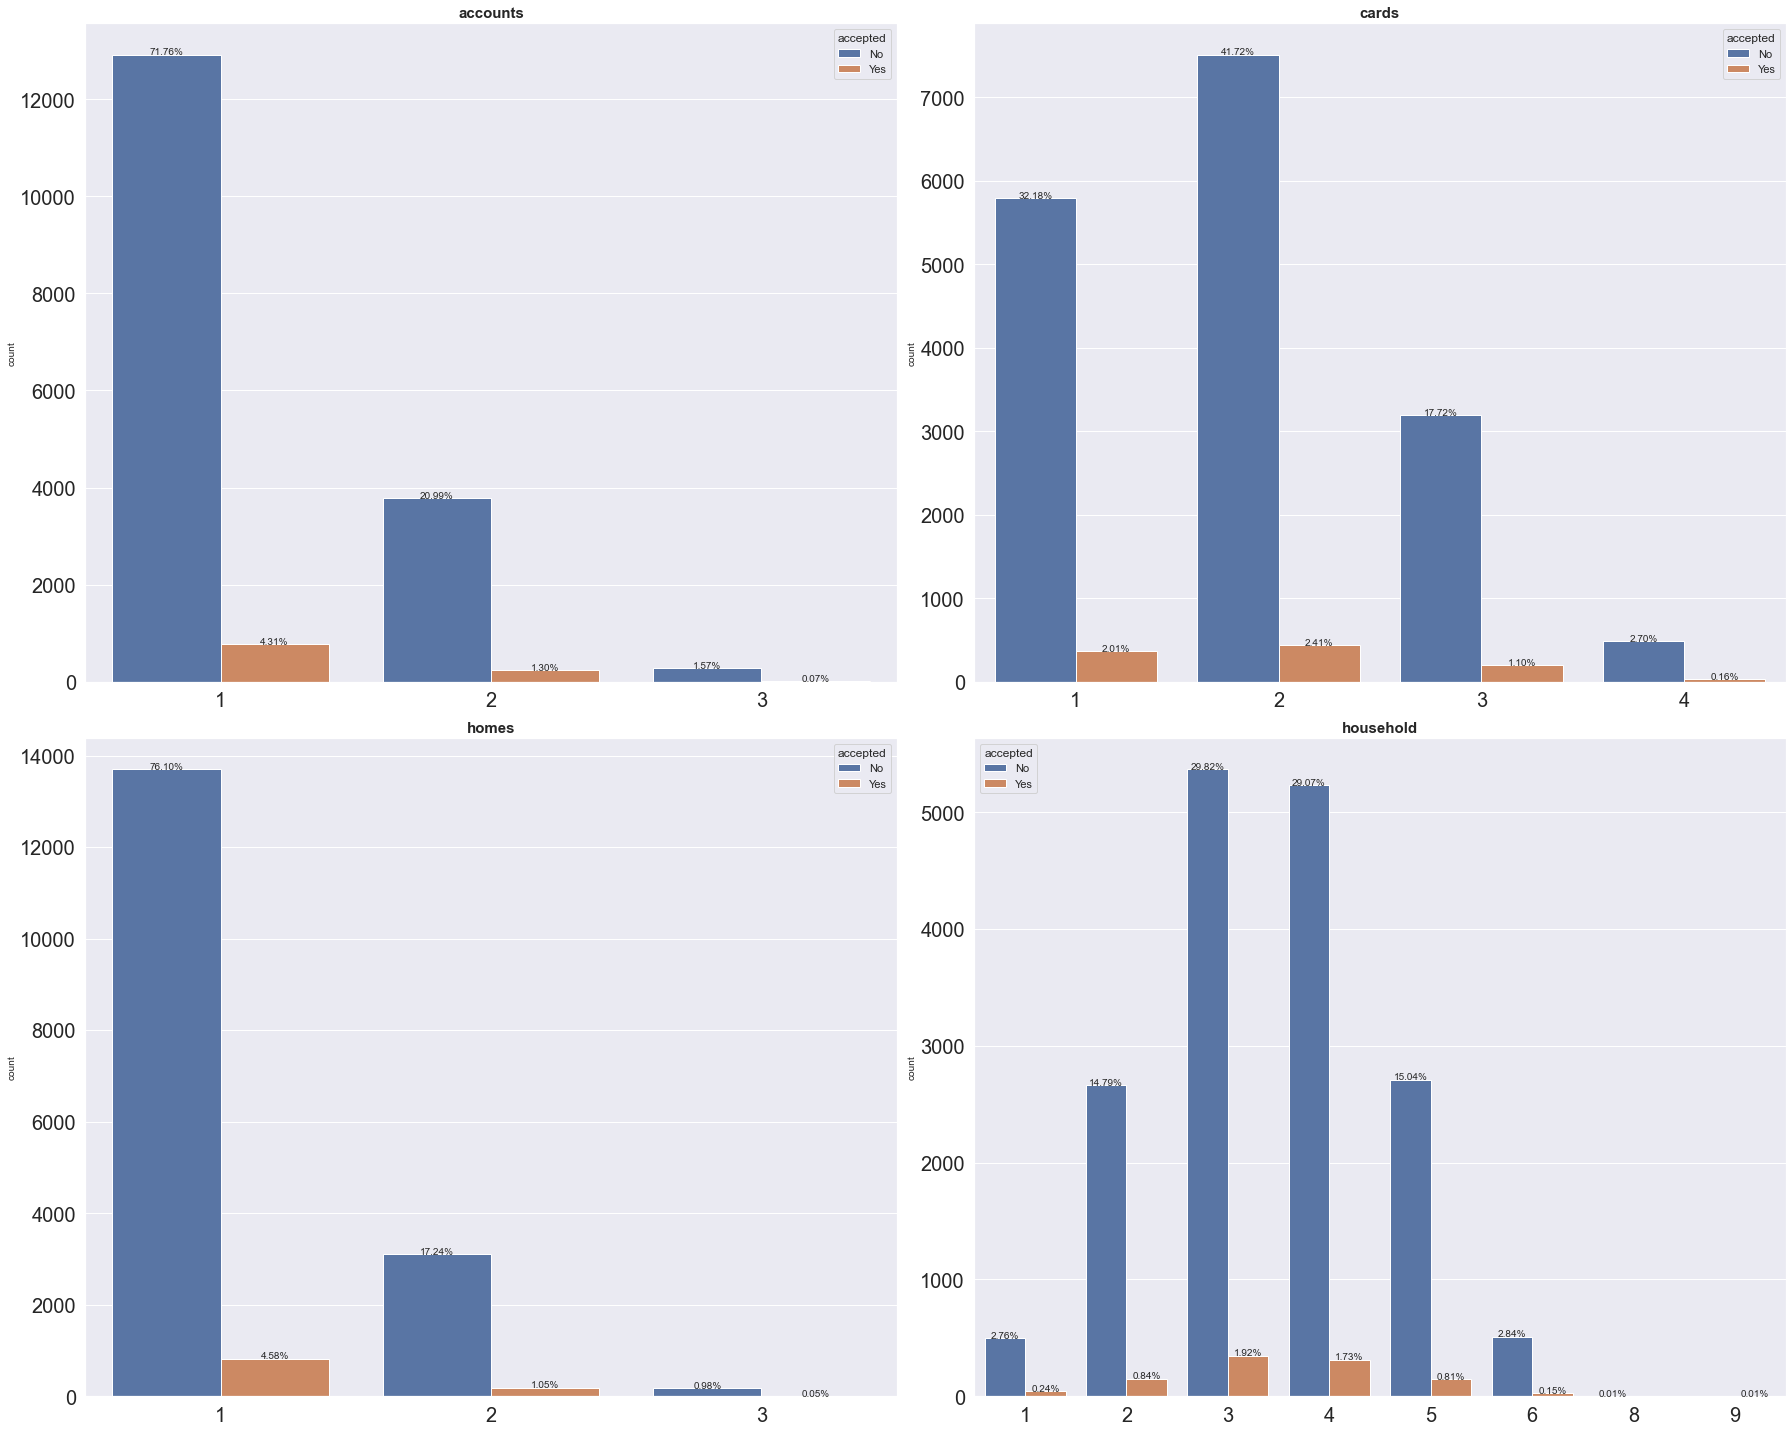

In [29]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 20))

lista_colores = ["blue", "green", "red", "magenta", "orange", "yellow", "purple", "gold", "cyan"]

axes = axes.flat

for i, colum in enumerate(columnas_numeric_dis): 
    chart = sns.countplot(
                x = df[colum],
                hue=df["accepted"],
                ax = axes[i])
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

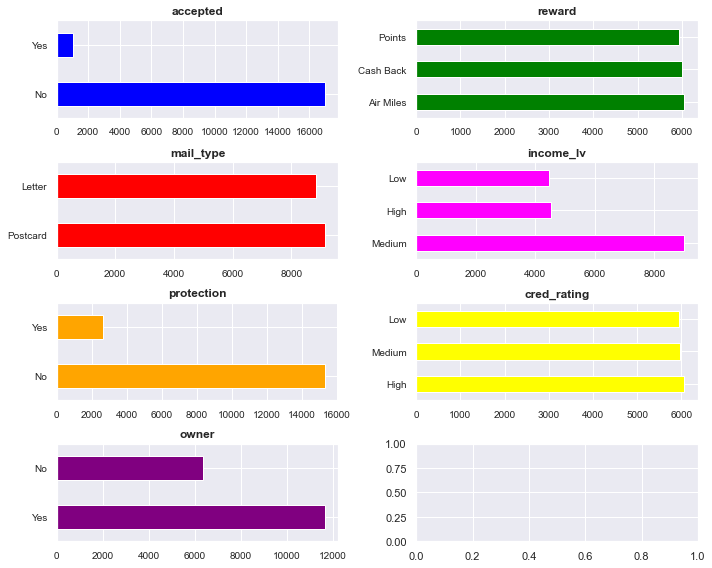

In [30]:
fig, axes = plt.subplots(4, 2, figsize = (10,8))

lista_colores = ["blue", "green", "red", "magenta", "orange", "yellow", "purple", "gold", "cyan"]

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i], color = lista_colores[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


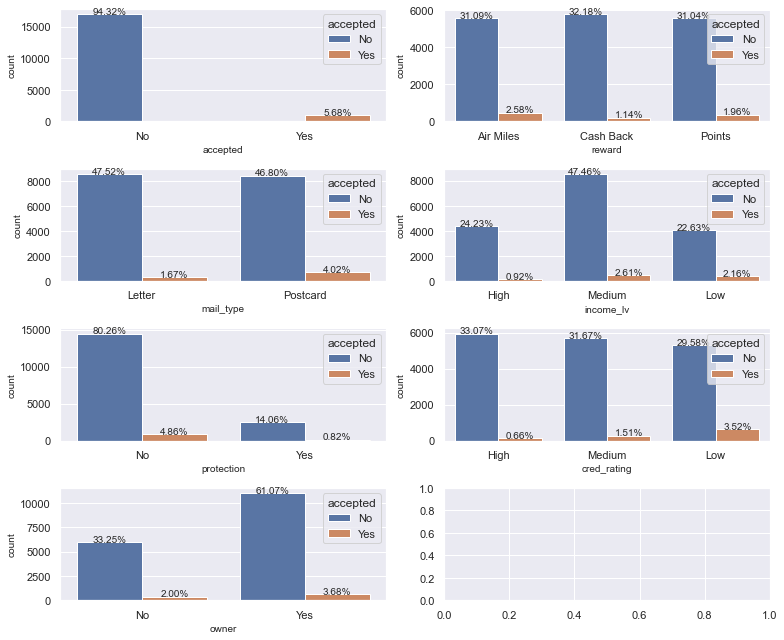

In [31]:
fig, axes = plt.subplots(4, 2, figsize = (11,9))

lista_colores = ["blue", "green", "red", "magenta", "orange", "yellow", "purple", "gold", "cyan"]

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    chart = sns.countplot(
                x = df[colum],
                hue=df["accepted"],
                ax = axes[i])
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')

    
fig.tight_layout();

# Gestion de nulos

In [32]:
df.isnull().sum()


id              0
accepted        0
reward          0
mail_type       0
income_lv       0
accounts        0
protection      0
cred_rating     0
cards           0
homes           0
household       0
owner           0
balanceQ1      24
balanceQ2      24
balanceQ3      24
balanceQ4      24
balance        24
dtype: int64

In [33]:
columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["id", "accounts", "cards", "homes", "household"])

imputer = IterativeImputer()
imputer.fit(df[columnas_numeric])

numericas_trans = pd.DataFrame(imputer.transform(df[columnas_numeric]), columns = df[columnas_numeric].columns)
numericas_trans.head()

,balanceQ1,balanceQ2,balanceQ3,balanceQ4,balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0


In [34]:
columnas = numericas_trans.columns
df = df.drop(columnas, axis = 1)
df[columnas] = numericas_trans
df.head()

,id,accepted,reward,mail_type,income_lv,accounts,protection,cred_rating,cards,homes,household,owner,balanceQ1,balanceQ2,balanceQ3,balanceQ4,balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [35]:
df.isnull().sum()

id             0
accepted       0
reward         0
mail_type      0
income_lv      0
accounts       0
protection     0
cred_rating    0
cards          0
homes          0
household      0
owner          0
balanceQ1      0
balanceQ2      0
balanceQ3      0
balanceQ4      0
balance        0
dtype: int64

# Gestion outliers

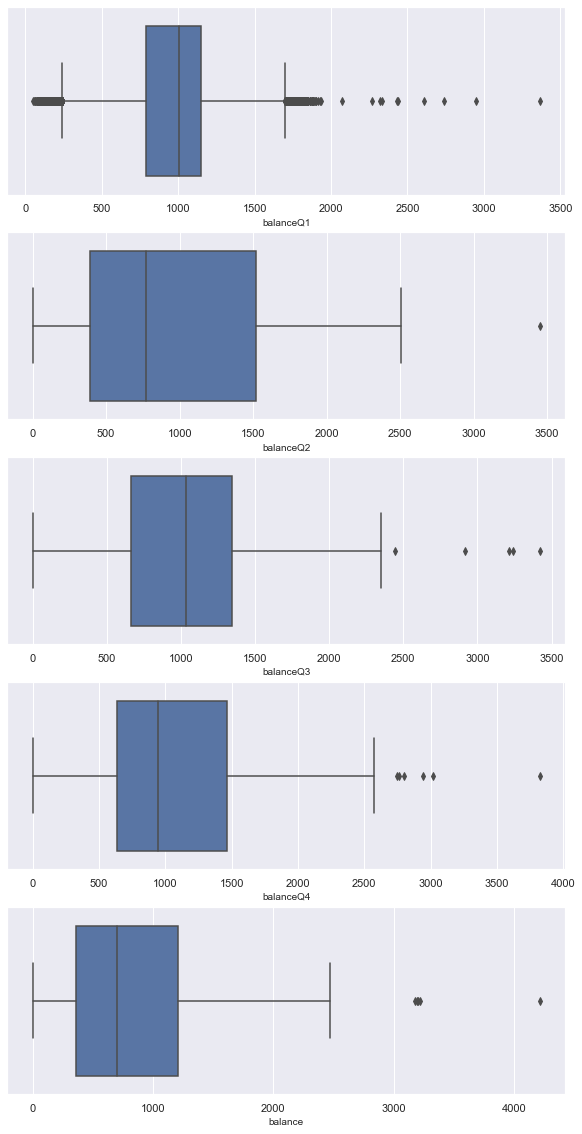

In [36]:
fig, ax = plt.subplots(5, 1, figsize=(10,20))

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["id", "accounts", "cards", "homes", "household"])

for i in range(len(columnas_numeric)):
    sns.boxplot(x = columnas_numeric[i], data = df, ax=ax[i])
plt.show() 

In [37]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [38]:
out_Q1 = df[df["balanceQ1"] >= 2000]
out_Q1.head()

,id,accepted,reward,mail_type,income_lv,accounts,protection,cred_rating,cards,homes,household,owner,balanceQ1,balanceQ2,balanceQ3,balanceQ4,balance
2296,2297,No,Air Miles,Letter,High,1,No,Medium,2,2,2,No,3366.25,2509.0,2918.0,3823.0,4215.0
2655,2656,No,Points,Letter,Medium,1,Yes,Low,2,1,5,No,2336.75,1638.0,2351.0,2180.0,3178.0
8777,8778,No,Cash Back,Postcard,Medium,1,No,High,1,1,2,No,2073.25,1490.0,1704.0,1898.0,3201.0
8887,8888,No,Cash Back,Letter,Medium,1,No,Medium,2,1,2,Yes,2738.50,2453.0,3240.0,3016.0,2245.0
10475,10476,No,Air Miles,Letter,Medium,1,Yes,High,1,1,4,Yes,2430.00,2435.0,2234.0,2576.0,2475.0


In [39]:
lista_Q1 = list(out_Q1.index)

In [40]:
for i in lista_Q1:
    df.loc[i, "balanceQ1"] = np.nan

In [41]:
indices_out = detectar_outliers(df[columnas_numeric].drop("balanceQ1", axis= 1),df)
indices_out

{'balanceQ2': [12635],
 'balanceQ3': [2296, 8887, 10576, 12635, 15259],
 'balanceQ4': [2296, 8887, 10576, 12635, 14003, 15608],
 'balance': [2296, 2655, 8777, 12633, 15608]}

In [42]:
for col in indices_out.keys():
    for i in indices_out[col]:
        df.loc[i, col] = np.nan

In [43]:
df[columnas_numeric]

,balanceQ1,balanceQ2,balanceQ3,balanceQ4,balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...
17995,167.50,136.0,65.0,71.0,398.0
17996,850.50,984.0,940.0,943.0,535.0
17997,1087.25,918.0,767.0,1170.0,1494.0
17998,1022.25,626.0,983.0,865.0,1615.0


In [44]:
numericas_trans2 = pd.DataFrame(imputer.transform(df[columnas_numeric]), columns = df[columnas_numeric].columns)
numericas_trans2.head()

,balanceQ1,balanceQ2,balanceQ3,balanceQ4,balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0


In [45]:
columnas = numericas_trans2.columns
df = df.drop(columnas, axis = 1)
df[columnas] = numericas_trans2
df.head()

,id,accepted,reward,mail_type,income_lv,accounts,protection,cred_rating,cards,homes,household,owner,balanceQ1,balanceQ2,balanceQ3,balanceQ4,balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [46]:
df.isnull().sum()

id             0
accepted       0
reward         0
mail_type      0
income_lv      0
accounts       0
protection     0
cred_rating    0
cards          0
homes          0
household      0
owner          0
balanceQ1      0
balanceQ2      0
balanceQ3      0
balanceQ4      0
balance        0
dtype: int64

# Estandarización

In [47]:
df[columnas_numeric].columns

Index(['balanceQ1', 'balanceQ2', 'balanceQ3', 'balanceQ4', 'balance'], dtype='object')

In [48]:
scaler = RobustScaler()
scaler.fit(df[df[columnas_numeric].columns])
X_escaladas = scaler.transform(df[df[columnas_numeric].columns])
df[df[columnas_numeric].columns] = X_escaladas
df.head()

,id,accepted,reward,mail_type,income_lv,accounts,protection,cred_rating,cards,homes,household,owner,balanceQ1,balanceQ2,balanceQ3,balanceQ4,balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,0.423037,0.795031,-0.227390,0.179952,0.351726
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,-2.356531,-0.651287,-1.365818,-1.048309,-0.398938
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,-2.002057,-0.360248,-1.002584,-0.967391,-0.545294
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,0.582791,0.714286,1.076412,0.208937,-0.336382
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,0.560850,1.212955,0.481358,0.043478,-0.400118


In [49]:

with open('../datos/estandarizacion.pkl', 'wb') as s:
    pickle.dump(scaler, s)

# Codificación

In [52]:
df.drop(["id"], axis = 1, inplace = True)

In [53]:
df[columnas_numeric_dis] = df[columnas_numeric_dis].astype(str)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


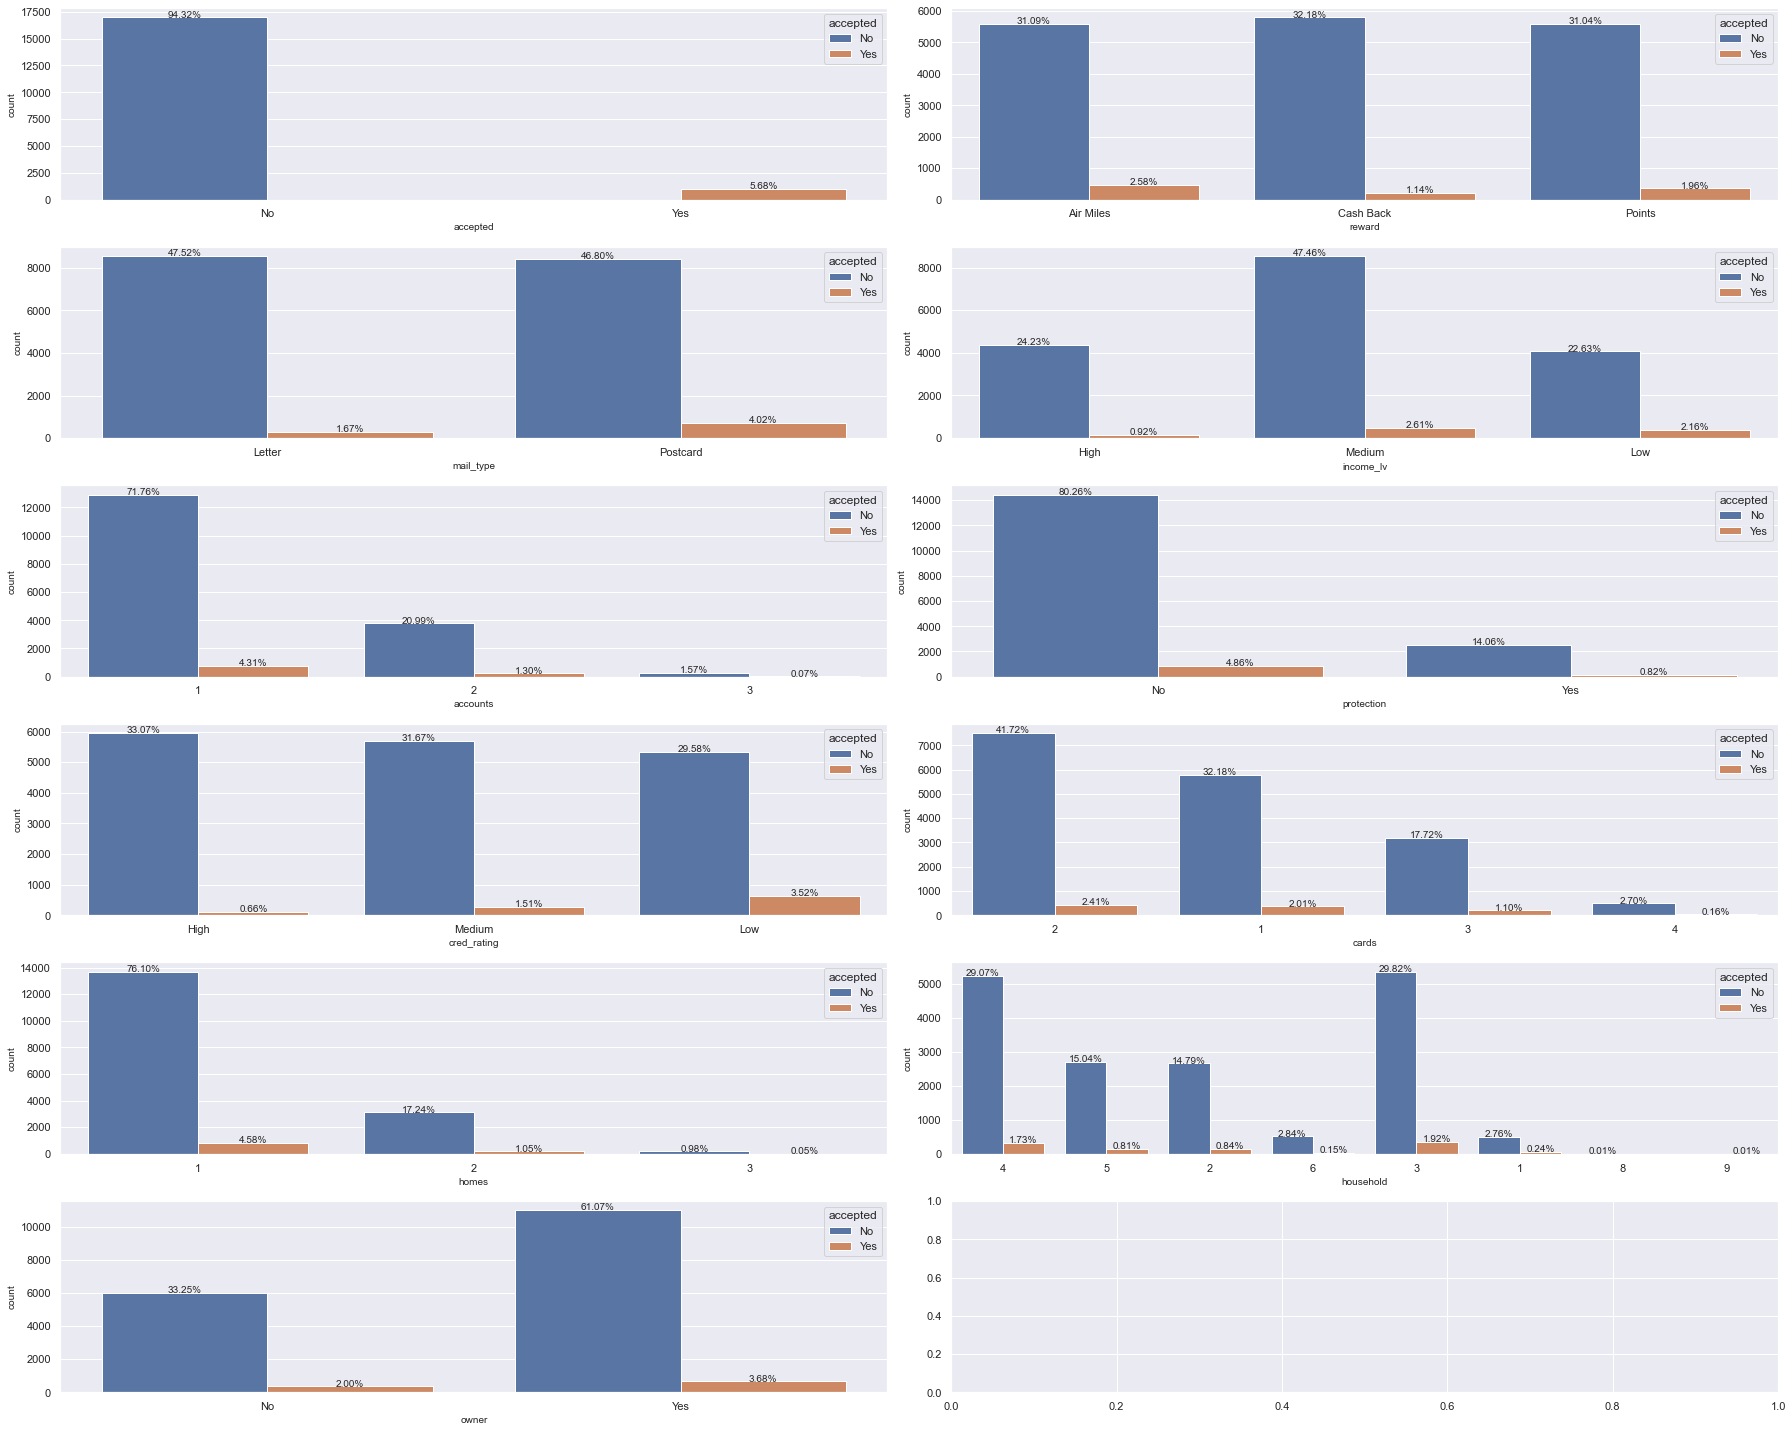

In [54]:
fig, axes = plt.subplots(6, 2, figsize = (25,20))

lista_colores = ["blue", "green", "red", "magenta", "orange", "yellow", "purple", "gold", "cyan"]

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    chart = sns.countplot(
                x = df[colum],
                hue=df["accepted"],
                ax = axes[i])
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')

    
fig.tight_layout();

In [55]:
columnas_object2 = df.select_dtypes(include = "object").columns
columnas_object2

Index(['accepted', 'reward', 'mail_type', 'income_lv', 'accounts',
       'protection', 'cred_rating', 'cards', 'homes', 'household', 'owner'],
      dtype='object')

In [56]:
dic_household = {"1" : "bajo", "2": "medio", "3": "alto", "4": "alto", "5" : "medio",
                "6": "bajo", "7": "bajo", "8": "bajo", "9": "bajo"}

In [57]:
df["household"]= df["household"].map(dic_household)

In [58]:
accepted_orden = ['No', 'Yes']
reward_orden = ["Cash Back", "Points", "Air Miles"]
mail_orden = ["Letter", "Postcard"]
income_orden = ["High", "Low", "Medium"]
accounts_orden = ["3", "2", "1"]
protection_orden = ["No", "Yes"]
cred_order = ['High', 'Medium', 'Low']
cards_order = ["4", "3", "1", "2"]
homes_order = ["3", "2", "1"]
household_order = ["bajo", "medio", "alto"]
owner_order = ['No', 'Yes']

In [59]:
def ordinal_encoder(orden, df, columna):
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe
    
    with open(f'../datos/encoding{columna}.pkl', 'wb') as s:
        pickle.dump(ordinal, s)
    return df

In [60]:
df = ordinal_encoder(accepted_orden, df, "accepted")
df = ordinal_encoder(reward_orden, df, "reward")
df = ordinal_encoder(mail_orden, df, "mail_type")
df = ordinal_encoder(income_orden, df, "income_lv")
df = ordinal_encoder(accounts_orden, df, "accounts")
df = ordinal_encoder(protection_orden, df, "protection")
df = ordinal_encoder(cred_order, df, "cred_rating")
df = ordinal_encoder(cards_order, df, "cards")
df = ordinal_encoder(homes_order, df, "homes")
df = ordinal_encoder(household_order, df, "household")
df = ordinal_encoder(owner_order, df, "owner")

# Balanceo de datos


In [61]:
smote_tomek = SMOTETomek()

In [62]:
Xsmote = df.drop("accepted", axis = 1)
ysmote = df["accepted"]

In [63]:
X_smotetomek, y_smotetomek = smote_tomek.fit_resample(Xsmote, ysmote)

In [64]:
df_balanced = pd.concat([y_smotetomek ,X_smotetomek], axis = 1)
df_balanced.head()

,accepted,reward,mail_type,income_lv,accounts,protection,cred_rating,cards,homes,household,owner,balanceQ1,balanceQ2,balanceQ3,balanceQ4,balance
0,0,2,0,0,2,0,0,3,2,2,0,0.423037,0.795031,-0.227390,0.179952,0.351726
1,0,2,0,2,2,0,1,3,1,1,1,-2.356531,-0.651287,-1.365818,-1.048309,-0.398938
2,0,2,1,0,1,0,1,3,2,1,1,-2.002057,-0.360248,-1.002584,-0.967391,-0.545294
3,0,2,0,2,1,0,0,2,2,2,0,0.582791,0.714286,1.076412,0.208937,-0.336382
4,0,2,0,2,2,0,1,3,2,0,1,0.560850,1.212955,0.481358,0.043478,-0.400118


In [65]:
df_balanced.shape

(33942, 16)

# Ajuste de modelo

In [66]:
X = df_balanced.drop("accepted", axis = 1)
y = df_balanced["accepted"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [68]:

y_train.describe()

count    23759.000000
mean         0.499516
std          0.500010
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: accepted, dtype: float64

In [69]:
y_test.describe()

count    10183.000000
mean         0.501129
std          0.500023
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: accepted, dtype: float64

# Regresión logística

In [70]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [71]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [72]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)

    plt.figure(figsize = (12, 8))
    sns.heatmap(matriz, square=True, annot=True, fmt="d", cmap = "viridis")

    plt.xlabel('valor predicho')
    plt.ylabel('valor real')
    plt.show()

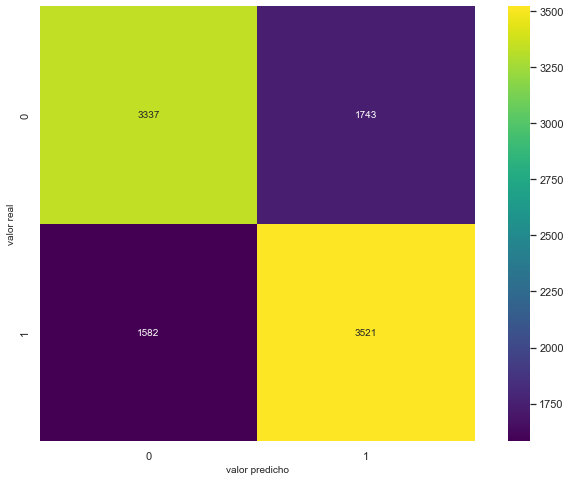

In [73]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

In [74]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [75]:
# Resultado de m....
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.673475,0.668883,0.689986,0.679271,0.346901,test,Regresión logistica
1,0.662780,0.658059,0.676357,0.667082,0.325578,train,Regresión logistica


In [76]:
with open('../datos/regresion_log.pkl', 'wb') as regresion_log:
        pickle.dump(lr, regresion_log)

# Decision Tree Classifier

In [77]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
max_features = np.sqrt(len(X_train.columns))
max_features

3.872983346207417

In [79]:
y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [80]:
results_decission_tree1 = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_decission_tree1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.841108,0.816415,0.88105,0.847502,0.682157,test,Decission Tree I
1,1.000000,1.000000,1.00000,1.000000,1.000000,train,Decission Tree I


In [81]:
df_all_results = pd.concat([results_logistic, results_decission_tree1], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.673475,0.668883,0.689986,0.679271,0.346901,test,Regresión logistica
1,0.662780,0.658059,0.676357,0.667082,0.325578,train,Regresión logistica
0,0.841108,0.816415,0.881050,0.847502,0.682157,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I


In [82]:
with open('../datos/tree1.pkl', 'wb') as tree1:
        pickle.dump(arbol, tree1)

In [83]:
print(arbol.tree_.max_depth)

36


In [87]:
param = {"max_depth": [2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
         "min_samples_split": [50, 100, 150, 200],
         "max_features": [1, 2, 3, 4, 5], 
         "min_samples_leaf": [50, 100, 150, 200]}

In [88]:
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [89]:
%%time
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits
CPU times: total: 19.3 s
Wall time: 1min 8s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [50, 100, 150, 200],
                         'min_samples_split': [50, 100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [90]:
arbol2.best_params_

{'max_depth': 16,
 'max_features': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [95]:
arbol3 = DecisionTreeClassifier( max_depth =  16, max_features = 5, min_samples_leaf = 50, min_samples_split = 50)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=16, max_features=5, min_samples_leaf=50,
                       min_samples_split=50)

In [96]:
y_pred_arbol_test= arbol3.predict(X_test)
y_pred_arbol_train= arbol3.predict(X_train)

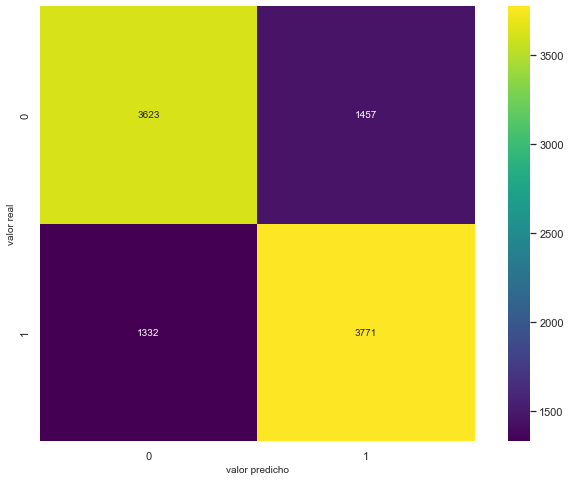

In [97]:

matriz_arbol = matriz_confusion(y_test, y_pred_arbol_test, y_test.shape[0])
matriz_arbol

In [98]:
results_decission_tree2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")
results_decission_tree2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.726112,0.721308,0.738977,0.730036,0.452191,test,Decission Tree II
1,0.750915,0.744373,0.763566,0.753847,0.501843,train,Decission Tree II


In [99]:
df_all_results = pd.concat([df_all_results, results_decission_tree2], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.673475,0.668883,0.689986,0.679271,0.346901,test,Regresión logistica
1,0.662780,0.658059,0.676357,0.667082,0.325578,train,Regresión logistica
0,0.841108,0.816415,0.881050,0.847502,0.682157,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
0,0.726112,0.721308,0.738977,0.730036,0.452191,test,Decission Tree II
1,0.750915,0.744373,0.763566,0.753847,0.501843,train,Decission Tree II


In [100]:
with open('../datos/tree2.pkl', 'wb') as tree2:
        pickle.dump(arbol3, tree2)

# Random Forest

In [101]:
param = {"max_depth": [2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
         "min_samples_split": [50, 100, 150],
         "max_features": [1, 2, 3, 4, 5], 
         "min_samples_leaf": [50, 100]}

random_forest = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1,  
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [102]:
%%time
random_forest.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
CPU times: total: 38.4 s
Wall time: 9min 12s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [50, 100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [103]:
random_forest.best_params_

{'max_depth': 16,
 'max_features': 1,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [104]:
clf = RandomForestClassifier(min_samples_split = 100,
                             min_samples_leaf = 50,
                             max_features = 1,
                             max_depth = 16)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=16, max_features=1, min_samples_leaf=50,
                       min_samples_split=100)

In [105]:
y_pred_clf_test = clf.predict(X_test)
y_pred_clf_train = clf.predict(X_train)

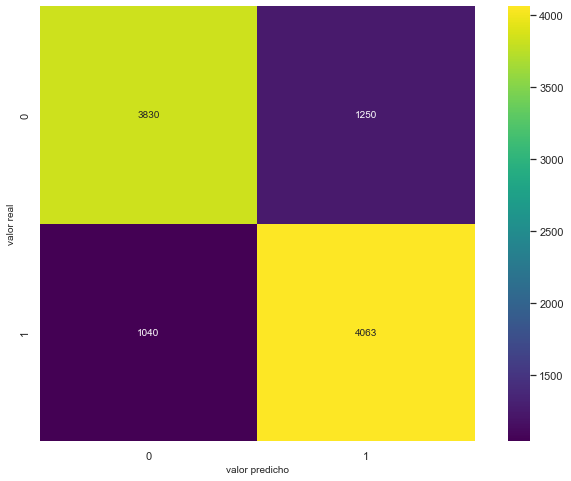

In [106]:

matriz_random = matriz_confusion(y_test, y_pred_clf_test, y_test.shape[0])
matriz_random


In [107]:

results_forest = metricas(y_test, y_pred_clf_test, y_train, y_pred_clf_train, "Random Forest")
df_all_results = pd.concat([df_all_results, results_forest], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.673475,0.668883,0.689986,0.679271,0.346901,test,Regresión logistica
1,0.662780,0.658059,0.676357,0.667082,0.325578,train,Regresión logistica
0,0.841108,0.816415,0.881050,0.847502,0.682157,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
0,0.726112,0.721308,0.738977,0.730036,0.452191,test,Decission Tree II
1,0.750915,0.744373,0.763566,0.753847,0.501843,train,Decission Tree II
0,0.775115,0.764728,0.796198,0.780146,0.550187,test,Random Forest
1,0.795698,0.785122,0.813701,0.799156,0.591411,train,Random Forest


In [108]:
with open('../datos/randomforest.pkl', 'wb') as bosque_aleatorio:
        pickle.dump(clf, bosque_aleatorio)

# KNeighborsClassifier

In [110]:
knn_scores = []

for k in range(1,21):
    score=cross_val_score(KNeighborsClassifier(n_neighbors = k),
                          X = X,
                          y = y,
                          cv = 10, 
                         scoring = "accuracy")
    knn_scores.append(score.mean())

In [114]:
knn = pd.DataFrame(knn_scores, range(1,21)).reset_index()
knn.columns = ["number_neighbors", "score"]
knn.sort_values(by = "score", ascending = False).head(3)

,number_neighbors,score
1,2,0.915120
0,1,0.913853
3,4,0.889547


In [115]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [116]:
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

In [117]:
results_knn = metricas(y_test, y_pred_knn_test, y_train, y_pred_knn_train, "KNN2")
df_all_results = pd.concat([df_all_results, results_knn])
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.673475,0.668883,0.689986,0.679271,0.346901,test,Regresión logistica
1,0.662780,0.658059,0.676357,0.667082,0.325578,train,Regresión logistica
0,0.841108,0.816415,0.881050,0.847502,0.682157,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
0,0.726112,0.721308,0.738977,0.730036,0.452191,test,Decission Tree II
1,0.750915,0.744373,0.763566,0.753847,0.501843,train,Decission Tree II
0,0.775115,0.764728,0.796198,0.780146,0.550187,test,Random Forest
1,0.795698,0.785122,0.813701,0.799156,0.591411,train,Random Forest
0,0.907493,0.869735,0.959044,0.912209,0.814942,test,KNN2
1,0.992087,1.000000,0.984159,0.992016,0.984174,train,KNN2


In [118]:
with open('../datos/knn2.pkl', 'wb') as knn_2:
        pickle.dump(knn, knn_2)

In [119]:
knn2 = KNeighborsClassifier(n_neighbors = 1)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [120]:
y_pred_knn_test2 = knn2.predict(X_test)
y_pred_knn_train2 = knn2.predict(X_train)

In [121]:
results_knn2 = metricas(y_test, y_pred_knn_test2, y_train, y_pred_knn_train2, "KNN1")
df_all_results = pd.concat([df_all_results, results_knn2])
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.673475,0.668883,0.689986,0.679271,0.346901,test,Regresión logistica
1,0.662780,0.658059,0.676357,0.667082,0.325578,train,Regresión logistica
0,0.841108,0.816415,0.881050,0.847502,0.682157,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
0,0.726112,0.721308,0.738977,0.730036,0.452191,test,Decission Tree II
1,0.750915,0.744373,0.763566,0.753847,0.501843,train,Decission Tree II
0,0.775115,0.764728,0.796198,0.780146,0.550187,test,Random Forest
1,0.795698,0.785122,0.813701,0.799156,0.591411,train,Random Forest
0,0.907493,0.869735,0.959044,0.912209,0.814942,test,KNN2
1,0.992087,1.000000,0.984159,0.992016,0.984174,train,KNN2


In [122]:
with open('../datos/knn1.pkl', 'wb') as knn_1:
        pickle.dump(knn2, knn_1)

In [123]:
knn3 = KNeighborsClassifier(n_neighbors = 4)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [124]:
y_pred_knn_test3 = knn3.predict(X_test)
y_pred_knn_train3 = knn3.predict(X_train)

In [125]:
results_knn4 = metricas(y_test, y_pred_knn_test3, y_train, y_pred_knn_train3, "KNN4")
df_all_results = pd.concat([df_all_results, results_knn4])
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.673475,0.668883,0.689986,0.679271,0.346901,test,Regresión logistica
1,0.662780,0.658059,0.676357,0.667082,0.325578,train,Regresión logistica
0,0.841108,0.816415,0.881050,0.847502,0.682157,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
0,0.726112,0.721308,0.738977,0.730036,0.452191,test,Decission Tree II
1,0.750915,0.744373,0.763566,0.753847,0.501843,train,Decission Tree II
0,0.775115,0.764728,0.796198,0.780146,0.550187,test,Random Forest
1,0.795698,0.785122,0.813701,0.799156,0.591411,train,Random Forest
0,0.907493,0.869735,0.959044,0.912209,0.814942,test,KNN2
1,0.992087,1.000000,0.984159,0.992016,0.984174,train,KNN2


In [126]:
with open('../datos/knn4.pkl', 'wb') as knn_4:
        pickle.dump(knn3, knn_4)

# Gradient Boosting

In [128]:
param = {"max_depth": [2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
         "min_samples_split": [50, 100, 150, 200],
         "max_features": [1, 2, 3, 4, 5], 
         "min_samples_leaf": [50, 100, 150]}
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [50, 100, 150, 200]},
             return_train_score=True, verbose=1)

In [129]:
grid.best_params_

{'max_depth': 16,
 'max_features': 2,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [130]:
y_pred_gb_test= grid.predict(X_test)
y_pred_gb_train= grid.predict(X_train)

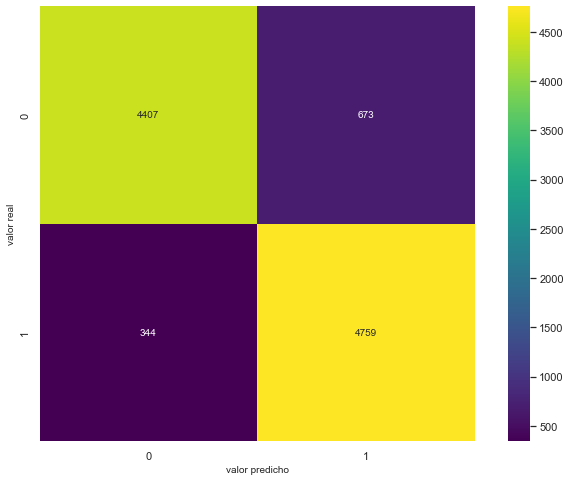

In [131]:
matriz_gradient = matriz_confusion(y_test, y_pred_gb_test, y_test.shape[0])
matriz_gradient

In [132]:
results_gradient = metricas(y_test, y_pred_gb_test, y_train, y_pred_gb_train, "Gradient")
df_all_results = pd.concat([df_all_results, results_gradient], axis = 0)
df_all_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.673475,0.668883,0.689986,0.679271,0.346901,test,Regresión logistica
1,0.662780,0.658059,0.676357,0.667082,0.325578,train,Regresión logistica
0,0.841108,0.816415,0.881050,0.847502,0.682157,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
0,0.726112,0.721308,0.738977,0.730036,0.452191,test,Decission Tree II
1,0.750915,0.744373,0.763566,0.753847,0.501843,train,Decission Tree II
0,0.775115,0.764728,0.796198,0.780146,0.550187,test,Random Forest
1,0.795698,0.785122,0.813701,0.799156,0.591411,train,Random Forest
0,0.907493,0.869735,0.959044,0.912209,0.814942,test,KNN2
1,0.992087,1.000000,0.984159,0.992016,0.984174,train,KNN2


In [133]:
with open('../datos/mejor_modelo_gradient.pkl', 'wb') as gradi:
        pickle.dump(grid, gradi)